## MERGING WITH MATERIALS

In [196]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

## GETTING MATERIALS

In [197]:
df_receivals = pd.read_csv(r'C:\Users\bupat\OneDrive\Documentos\NTNU\modern_ml_in_practice\append_consulting_project\data\kernel\purchase_receivals.csv')
df_materials = pd.read_csv(r'C:\Users\bupat\OneDrive\Documentos\NTNU\modern_ml_in_practice\append_consulting_project\data\extended\materials.csv')

In [198]:
df_materials.info()
df_receivals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   rm_id                     1217 non-null   float64
 1   product_id                1217 non-null   float64
 2   product_version           1217 non-null   float64
 3   raw_material_alloy        1217 non-null   object 
 4   raw_material_format_type  1217 non-null   float64
 5   stock_location            1217 non-null   object 
dtypes: float64(4), object(2)
memory usage: 57.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48747 entries, 0 to 48746
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              48747 non-null  int64  
 1   rm_id                   48747 non-null  float64
 2   product_id              48747 non-null  int64  
 3   purchase_order_id     

## DROP RAW_MATERIAL_ALLOY AND RAW_MATERIAL_FORMAT_TYPE AS THESE ARE INCLUDED IN RM_ID

In [199]:
# drop raw_material_alloy
df_materials = df_materials.drop(columns=['raw_material_alloy', 'raw_material_format_type'])

## INDEX STOCK_LOCATION TO NUMBERS AS IT IS A STRING

In [200]:
# index stock_location to numbers as it is a string
df_materials['stock_location'] = df_materials['stock_location'].astype('category').cat.codes
df_materials.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rm_id            1217 non-null   float64
 1   product_id       1217 non-null   float64
 2   product_version  1217 non-null   float64
 3   stock_location   1218 non-null   int16  
dtypes: float64(3), int16(1)
memory usage: 31.1 KB


## MERGE STOCK_LOCATION

In [201]:
# Step 2: Merge stock_location using full keys
# -------------------------------
df_receivals_mat = pd.merge(
    df_receivals,
    df_materials[['rm_id', 'product_id', 'product_version', 'stock_location']],
    on=['rm_id', 'product_id', 'product_version'],
    how='left'
)
df_receivals_mat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48747 entries, 0 to 48746
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              48747 non-null  int64  
 1   rm_id                   48747 non-null  float64
 2   product_id              48747 non-null  int64  
 3   purchase_order_id       48747 non-null  int64  
 4   purchase_order_item_no  48747 non-null  int64  
 5   receival_item_no        48747 non-null  int64  
 6   batch_id                48747 non-null  float64
 7   date_arrival            48747 non-null  object 
 8   receival_status         48747 non-null  int64  
 9   net_weight              48747 non-null  float64
 10  supplier_id             48747 non-null  int64  
 11  day_of_year             48747 non-null  int64  
 12  month                   48747 non-null  int64  
 13  year                    48747 non-null  int64  
 14  purchase_prob           48747 non-null

## MICE TO IMPUTE STOCK_LOCATION

In [202]:
from sklearn.experimental import enable_iterative_imputer  # noqa: F401
from sklearn.impute import IterativeImputer
import numpy as np

# Copy relevant columns
cols = ['rm_id', 'product_id', 'product_version', 'stock_location']  # stock_location already integer-encoded

# Initialize MICE imputer
imputer = IterativeImputer(random_state=0)

# Apply imputer
imputed_array = imputer.fit_transform(df_receivals_mat[cols])

# Assign imputed values back
df_receivals_mat['stock_location'] = np.round(imputed_array[:, -1]).astype(int)  # round to nearest valid integer

df_receivals_mat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48747 entries, 0 to 48746
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              48747 non-null  int64  
 1   rm_id                   48747 non-null  float64
 2   product_id              48747 non-null  int64  
 3   purchase_order_id       48747 non-null  int64  
 4   purchase_order_item_no  48747 non-null  int64  
 5   receival_item_no        48747 non-null  int64  
 6   batch_id                48747 non-null  float64
 7   date_arrival            48747 non-null  object 
 8   receival_status         48747 non-null  int64  
 9   net_weight              48747 non-null  float64
 10  supplier_id             48747 non-null  int64  
 11  day_of_year             48747 non-null  int64  
 12  month                   48747 non-null  int64  
 13  year                    48747 non-null  int64  
 14  purchase_prob           48747 non-null

## REMOVE "UNNAMED:0" COLUMN

In [203]:
# REMOVE "UNNAMED:0" COLUMN
df_receivals_mat = df_receivals_mat.drop(columns=['Unnamed: 0'])
df_receivals_mat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48747 entries, 0 to 48746
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   rm_id                   48747 non-null  float64
 1   product_id              48747 non-null  int64  
 2   purchase_order_id       48747 non-null  int64  
 3   purchase_order_item_no  48747 non-null  int64  
 4   receival_item_no        48747 non-null  int64  
 5   batch_id                48747 non-null  float64
 6   date_arrival            48747 non-null  object 
 7   receival_status         48747 non-null  int64  
 8   net_weight              48747 non-null  float64
 9   supplier_id             48747 non-null  int64  
 10  day_of_year             48747 non-null  int64  
 11  month                   48747 non-null  int64  
 12  year                    48747 non-null  int64  
 13  purchase_prob           48747 non-null  float64
 14  quantity                48747 non-null

## BOX-PLOT FOR ALL FEATURES OF DF_RECEIVALS_MAT

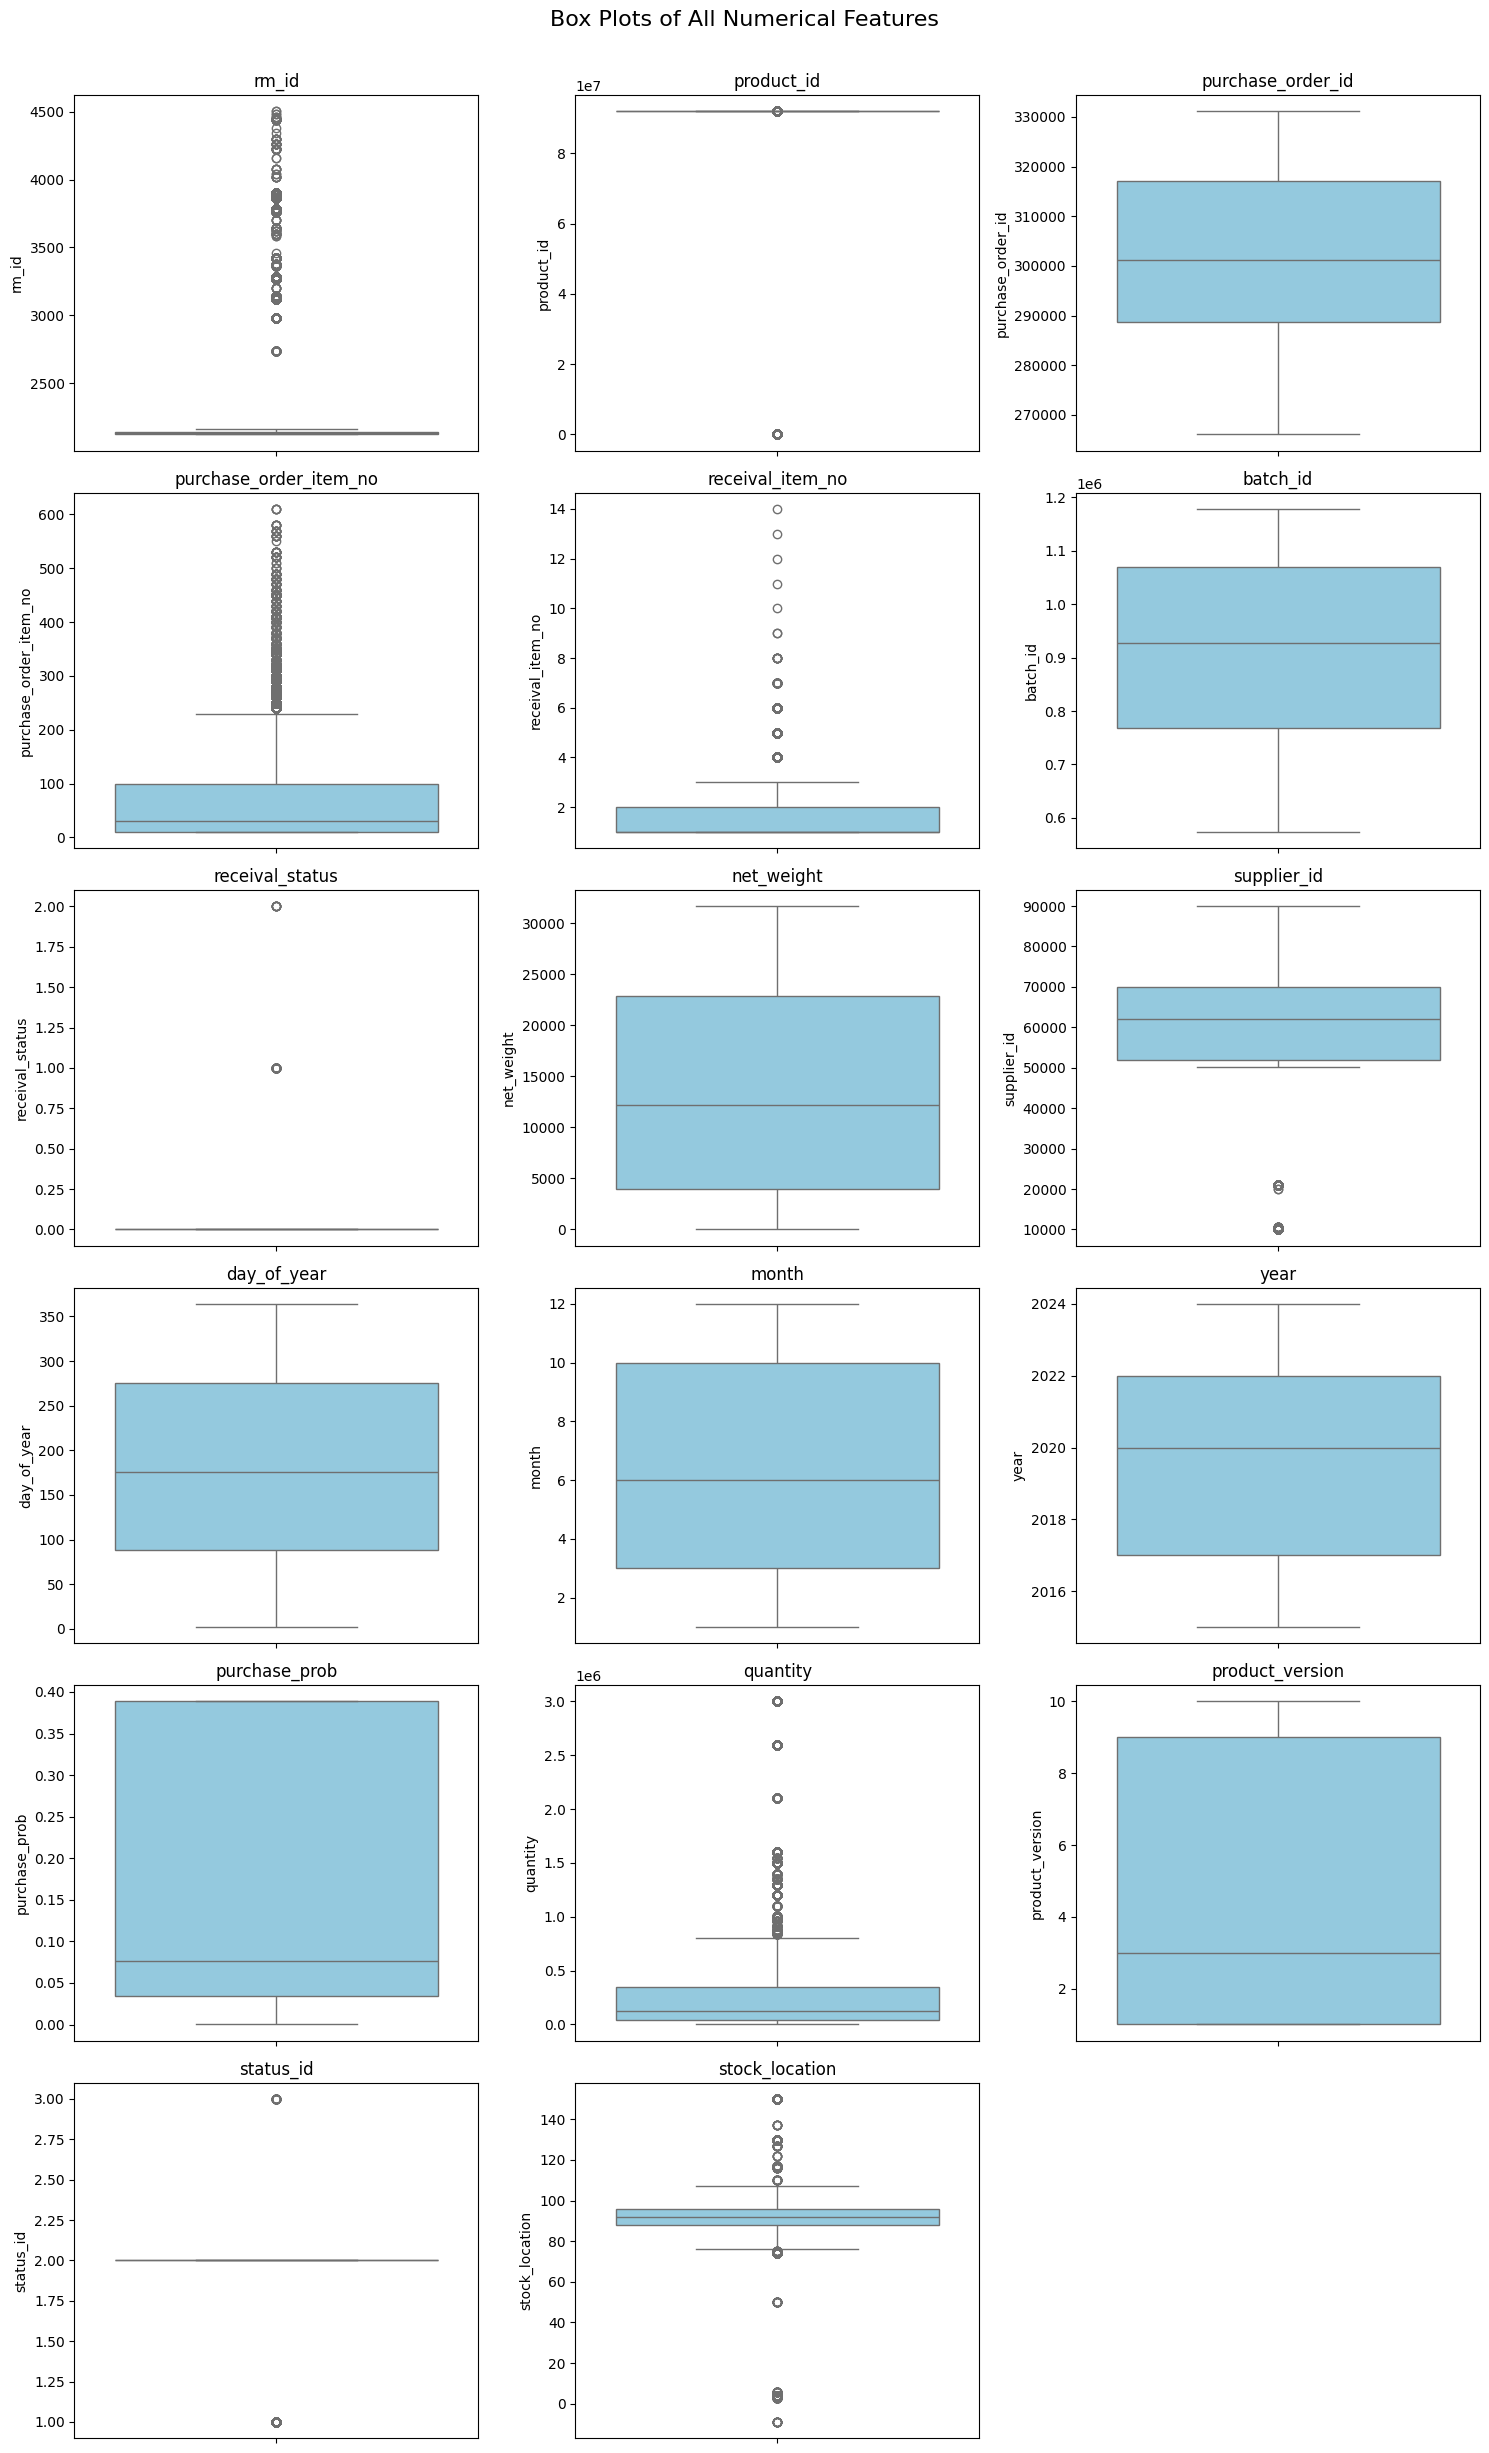

In [204]:
# Select numerical features
numeric_cols = df_receivals_mat.select_dtypes(include='number').columns

# Grid size
n_cols = 3  # number of plots per row
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols  # ceil division

plt.figure(figsize=(5 * n_cols, 4 * n_rows))

for i, col in enumerate(numeric_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(y=df_receivals_mat[col], color='skyblue')
    plt.title(col)
    plt.tight_layout()

plt.suptitle("Box Plots of All Numerical Features", fontsize=16, y=1.02)
plt.show()

## CORRELATION

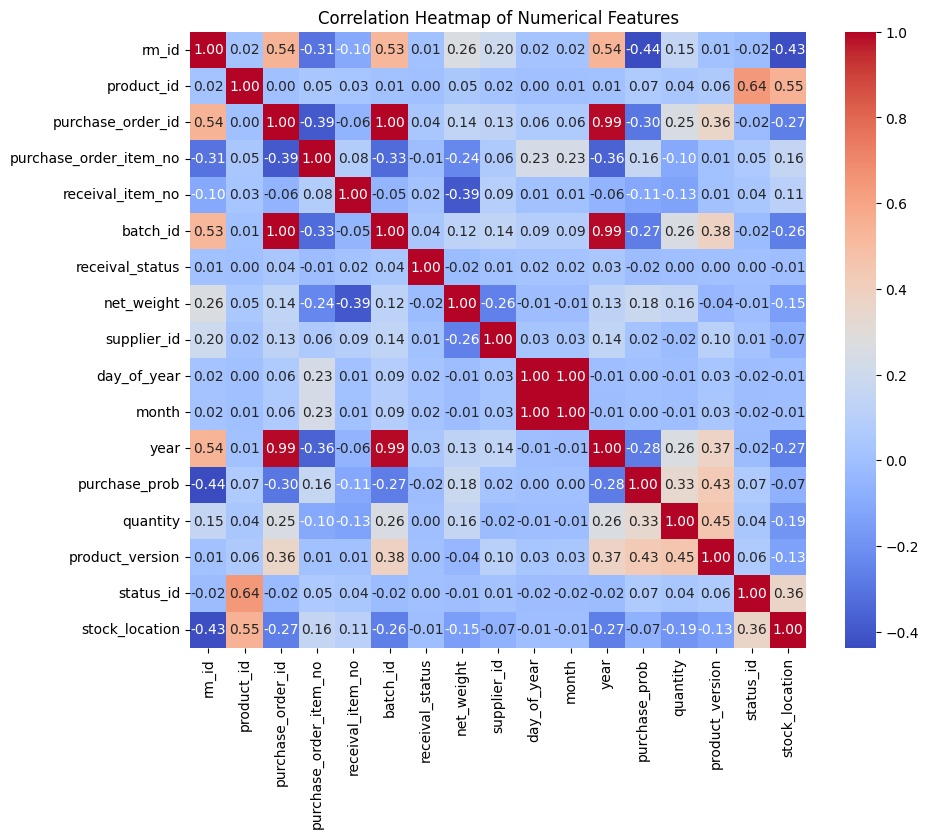

In [205]:
## # correlation heatmap for numerical features
plt.figure(figsize=(10, 8))
correlation_matrix = df_receivals_mat[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


## SAVE TO CSV

In [206]:
# SAVE TO CSV
df_receivals.to_csv(r'C:\Users\bupat\OneDrive\Documentos\NTNU\modern_ml_in_practice\append_consulting_project\data\kernel\materials_received.csv', index=False)